## Least Squares Fitting

We covered the idea of interpolation where the idea was to create a curve that exactly hits all the provided points.  To do this, of course, the polynomial needed to be of order equal to N-1 where N is the number of points.

Just as commonly, and maybe more so for data analysis and simulation purposes, one instead wants to find how closes a number of points follows some functional form.  This is the purpose of **curve fitting** or **regression analysis**.

There are many different resources and approaches related to curve-fitting, here we concentrate on a straight-forward method that will allow us to fit polynomials known as least-squares fitting.

The fundamental idea is that given an assumed functional form (1D case) that should represent the data, y=f(x), we want to have f(x) minimize the sum of the squared deviations of the function from the known points.  If our N data points are given by (x_i,y_i), we want to minimize the error function -

$$E=\sum_{i=1}^{N}(y_i-f(x_i))^2$$

For instance, suppose we are trying to fit a straight line to a curve.  In this case -
$$f(x) = ax+b$$
and we want to minimize - 
$$E=\sum_{i=1}^{N}(y_i-(ax_i+b))^2$$
The task is to find the a and b values that minimizes E.  The requirement here is that -

$$\frac{\partial E}{\partial a}=0\ \ \ \ \ \ \ \frac{\partial E}{\partial b}=0$$

Which are solved by - 

$$a = \frac{\sum_{i=1}^{N}x_i y_i -N\bar{x}\bar{y}}{\sum_{i=1}^{N}{x_i^2} - N\bar{x}^2}$$
$$b = \frac{\bar{y}\sum_{i=1}^{N}{x_i}^2 -\bar{x}\sum_{i=1}^{N}x_i y_i}{\sum_{i=1}^{N}{x_i^2} - N\bar{x}^2}$$

where the barred quantities are the average x and y values.

For now we forgo the derivation of the estimates of a, b.   Suffice to say for now, that we can make f(x) more complicated, for instance a cubic or higher order polynomial.  f(x) can even include more complicated non-polynomial functions.   This is all still called **linear least-squares fitting** because we are minimizing the error function coming from squaring the differences and it is linear in the coefficients.  Often matrix operations are important in calculating these kinds of quantities.

### Data with Errors

When there are explicit errors associated with the data points, say the y-values, there are related techniques for performing a fit.  The most common approach is to use an error function based upon a $\chi^2$ like function -

$$E=\sum_{i=1}^{N}\frac{(y_i-f(x_i))}{\sigma_{i}^{2}}^2$$

where the $\sigma_i$ is the error associated with the y$_i$ value.  Many fitting packages have options to include data errors in their calculations.

### Numpy Polyfit 

There are several options in python for fitting routines.   Here we show a script using the Numpy Polyfit routine.  Basically, we need to provide polyfit with the x and y datapoints, and the desired polynomial degree.

Polyfit then returns as an array the coefficients of the polynomial fit, with the first element being the coefficient for the highest order of x on down to the constant term.

The result is a curve minimizing the Error function from above.  Whether or not the fit function is appropriate is up to the user.

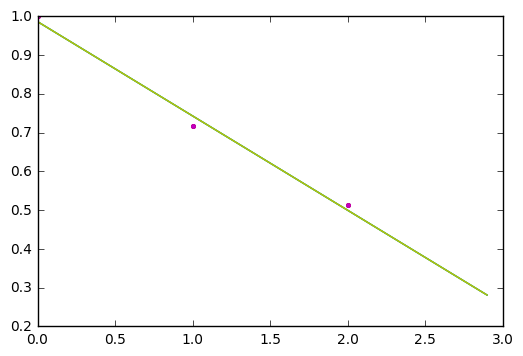

In [18]:
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(0,3)  
y = np.exp(-x/3.0)  
myfit = np.polyfit(x,y,1)  #third element is degree, so linear fit here
xnew = np.arange(0,3,0.1)  
myline = np.poly1d(myfit)
plt.plot(x, y, '.', xnew, myline(xnew), '-')
plt.show()

In [19]:
myfit

array([-0.24329144,  0.98660758])

## Fractal Dimension as Mass Growth

Diffusion and cluster growth are opposite processes.  Here we calculate a cluster using the Eden model (cancer-like).  The idea is to start with a nucleation center, and allow new sites to be occupied that are on the boundary of old sites.  The trick is to keep track of which sites are occupied, which available for occupation, and which are stagnant.

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:50: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


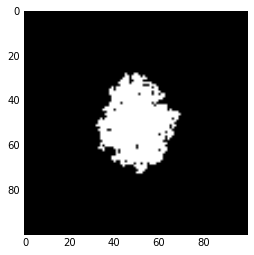

In [88]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

#########################################

ncells=1000  #number of sites to fill
nside=100    #width of the grid
#create an array of index increments for use in populating sites

neighbors=np.array([
    (0, 1), 
    (0, -1), 
    (1, 0), 
    (-1, 0)
])

body=np.zeros((nside,nside))-1
ctr=int(nside/2)
body[ctr,ctr] = 1
for near in neighbors:
    body[ctr+near[0],ctr+near[1]] = 0

for i in range(ncells-1):
    gsites = np.where(body==0)
    nget=np.random.choice(gsites[0].size)
    curx=gsites[0][nget]
    cury=gsites[1][nget]
    body[curx,cury] = 1
    
   # fill=np.random.choice(gsites)
    for near in neighbors:    #now check the neighbors, and if -1 change to 0
        if body[curx+near[0],cury+near[1]] == -1:
            body[curx+near[0],cury+near[1]] = 0

cleanup=np.where(body==-1)
body[cleanup]=0

gindex=np.transpose(gsites)  #change the order of gsites to create two element position indices
mass=np.zeros(ctr)

filled=np.where(body==1)
filled=np.transpose(filled)
distances=np.linspace(1,ctr-1)

for k in distances:
    for cur in filled:
        rdist=np.sqrt((ctr-cur[0])**2 + (ctr-cur[1])**2)
        if rdist <= k:
            mass[k]+=1
plt.imshow(body)
plt.gray()
plt.show()    

In [8]:
tmpind=np.transpose(gsites)

In [52]:
mass.size

49

In [50]:
mass

array([    0.,    14.,    25.,    45.,    69.,   109.,   145.,   193.,
         241.,   293.,   364.,   434.,   504.,   584.,   654.,   733.,
         795.,   846.,   893.,   922.,   949.,   969.,   978.,   989.,
         997.,  1000.,  1000.,  1000.,  1000.,  1000.,  1000.,  1000.,
        1000.,  1000.,  1000.,  1000.,  1000.,  1000.,  1000.,  1000.,
        1000.,  1000.,  1000.,  1000.,  1000.,  1000.,  1000.,  1000.,
        1000.])

Let us use the polyfit function discussed above to find the fit in the middle of the linear range and plot/print the results

Linear regression using numpy.polyfit and poly1d
parameters: a=2.03 b=1.06


/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:7: RuntimeWarning: divide by zero encountered in log


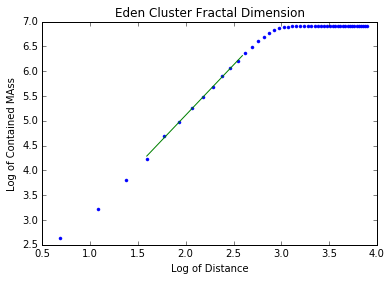

In [89]:
myfit = np.polyfit(np.log(distances[4:15]),np.log(mass[4:15]),1)  
myline = np.poly1d(myfit)
xnew = np.arange(np.log(distances[4]),np.log(distances[14]),0.1)  
print('Linear regression using numpy.polyfit and poly1d')
print('parameters: a=%.2f b=%.2f' % (myline[1],myline[0]))
#print('parameters: a=%.2f b=%.2f \nstd error= %.3f' % (myline[1],myline[0]))
plt.plot(np.log(distances),np.log(mass), '.', xnew, myline(xnew), '-')
plt.xlabel("Log of Distance")
plt.ylabel("Log of Contained Mass")
plt.title("Eden Cluster Fractal Dimension")
plt.show()

In [73]:
myfit #print out the calculated fit coefficients, for a line the first is the slope, second the y-intercept

(array([ 2.04027008,  1.03460343]),
 array([ 0.00571108]),
 2,
 array([ 1.4101439 ,  0.10721097]),
 2.4424906541753444e-15)

Another option is the **linregress** function from scipy.stats.  This gives 

In [90]:
from scipy import stats
import numpy as np
x = np.log(distances[4:15])
y = np.log(mass[4:15])
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print('Linear regression using stats.linregress')
print('parameters: a=%.2f b=%.2f \nstd error= %.3f' % (slope,intercept,std_err))

Linear regression using stats.linregress
parameters: a=2.03 b=1.06 
std error= 0.023


Yet another option for fitting is the **curve_fit** function from **scipy.optimize**.  I like its immediate flexibility in defining the function, and in providing a covariance matrix. 

A **covariance matrix** is an NxN matrix where N is the number of fit parameters.  The diagonal elements are the variance of the parameters, and the off-diagonal elements the cross-variance of pairs of parameters.  We can estimate the standard deviation of a parameter as the square root of the appropriate diagonal element.

In [91]:
from scipy.optimize import curve_fit

def line(x, a, b):
    return a * x + b

x = np.log(distances[4:15])
y = np.log(mass[4:15])
popt, pcov = curve_fit(line, x, y)
print('Linear regression using scipy.optimize.curve_fit')
print('parameters: a=%.2f b=%.2f \nstd error on slope (a)= %.3f' % (slope,intercept,np.sqrt(pcov[0,0])))

Linear regression using scipy.optimize.curve_fit
parameters: a=2.03 b=1.06 
std error on slope (a)= 0.023
